# Read sensitivity kernel

In [1]:
from pytomoatt.data import ATTData
import numpy as np

In [2]:
# file to be read
input_file = 'OUTPUT_FILES/OUTPUT_FILES_fields/out_data_sim_group_0.h5'
# input parameters file
par_file = '3_input_params/input_params_inv.yaml'
# grid file
grid_file = 'OUTPUT_FILES/OUTPUT_FILES_fields/out_data_grid.h5'

# read sensitivity kernel
group   = "model"          # "src_$src_name"
dataset = "Ks_inv_0000"  # "T_res_inv_$iter"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()

# we can access 3D kernel related to slowness
tmp = data_field[dataset]
print("3D slowness kernel shape: ", tmp.shape)

# or we can interp it to a 2D slice at depth
depth = 0.0
tmp = data_field.interp_dep(depth, field=dataset)
lon   = tmp[:,0]
lat   = tmp[:,1]
Ks    = tmp[:,2]

# Similarly, we do the same process for kernels related to xi and eta
dataset = "Kxi_inv_0000"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()
Kxi = data_field.interp_dep(depth, field=dataset)[:,2]

dataset = "Keta_inv_0000"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()
Keta = data_field.interp_dep(depth, field=dataset)[:,2]

3D slowness kernel shape:  (7, 201, 201)


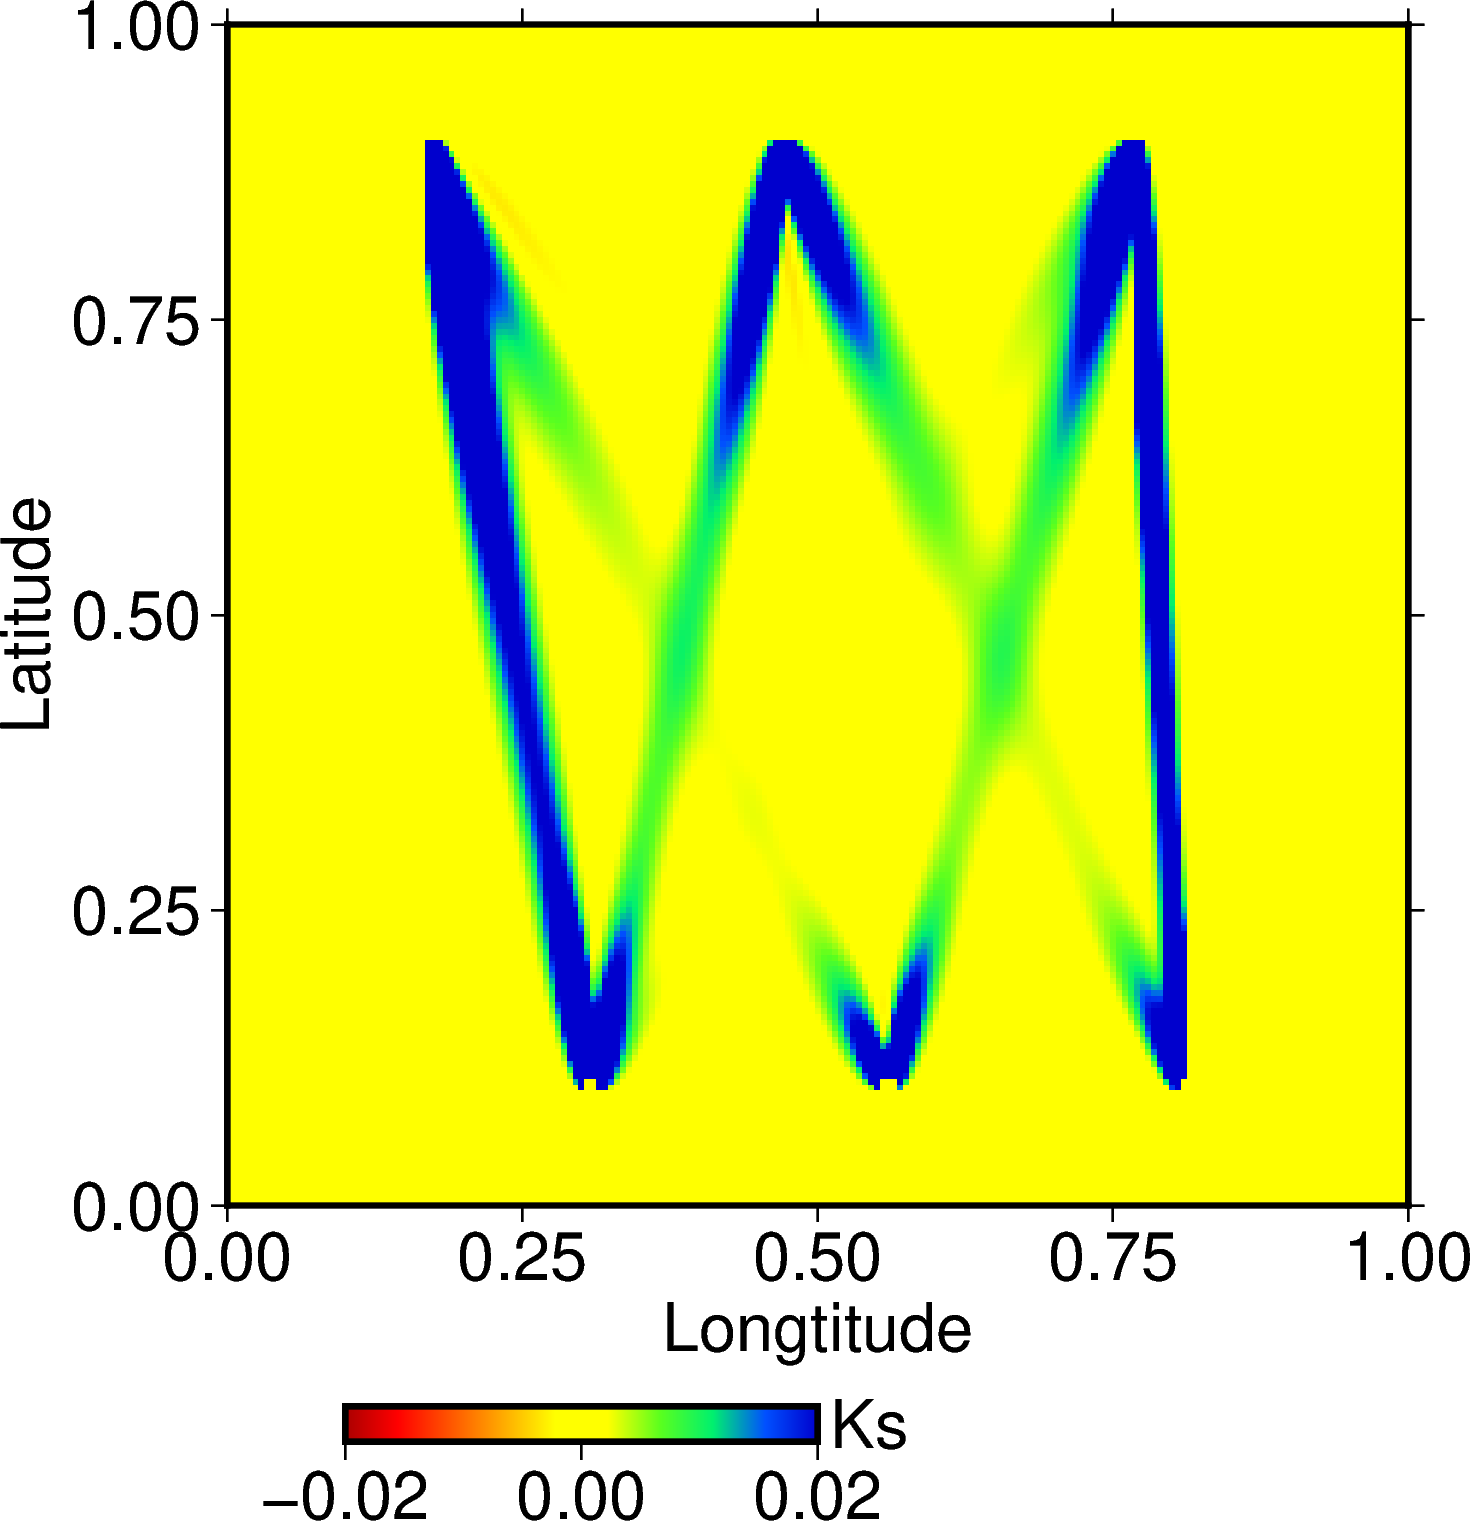

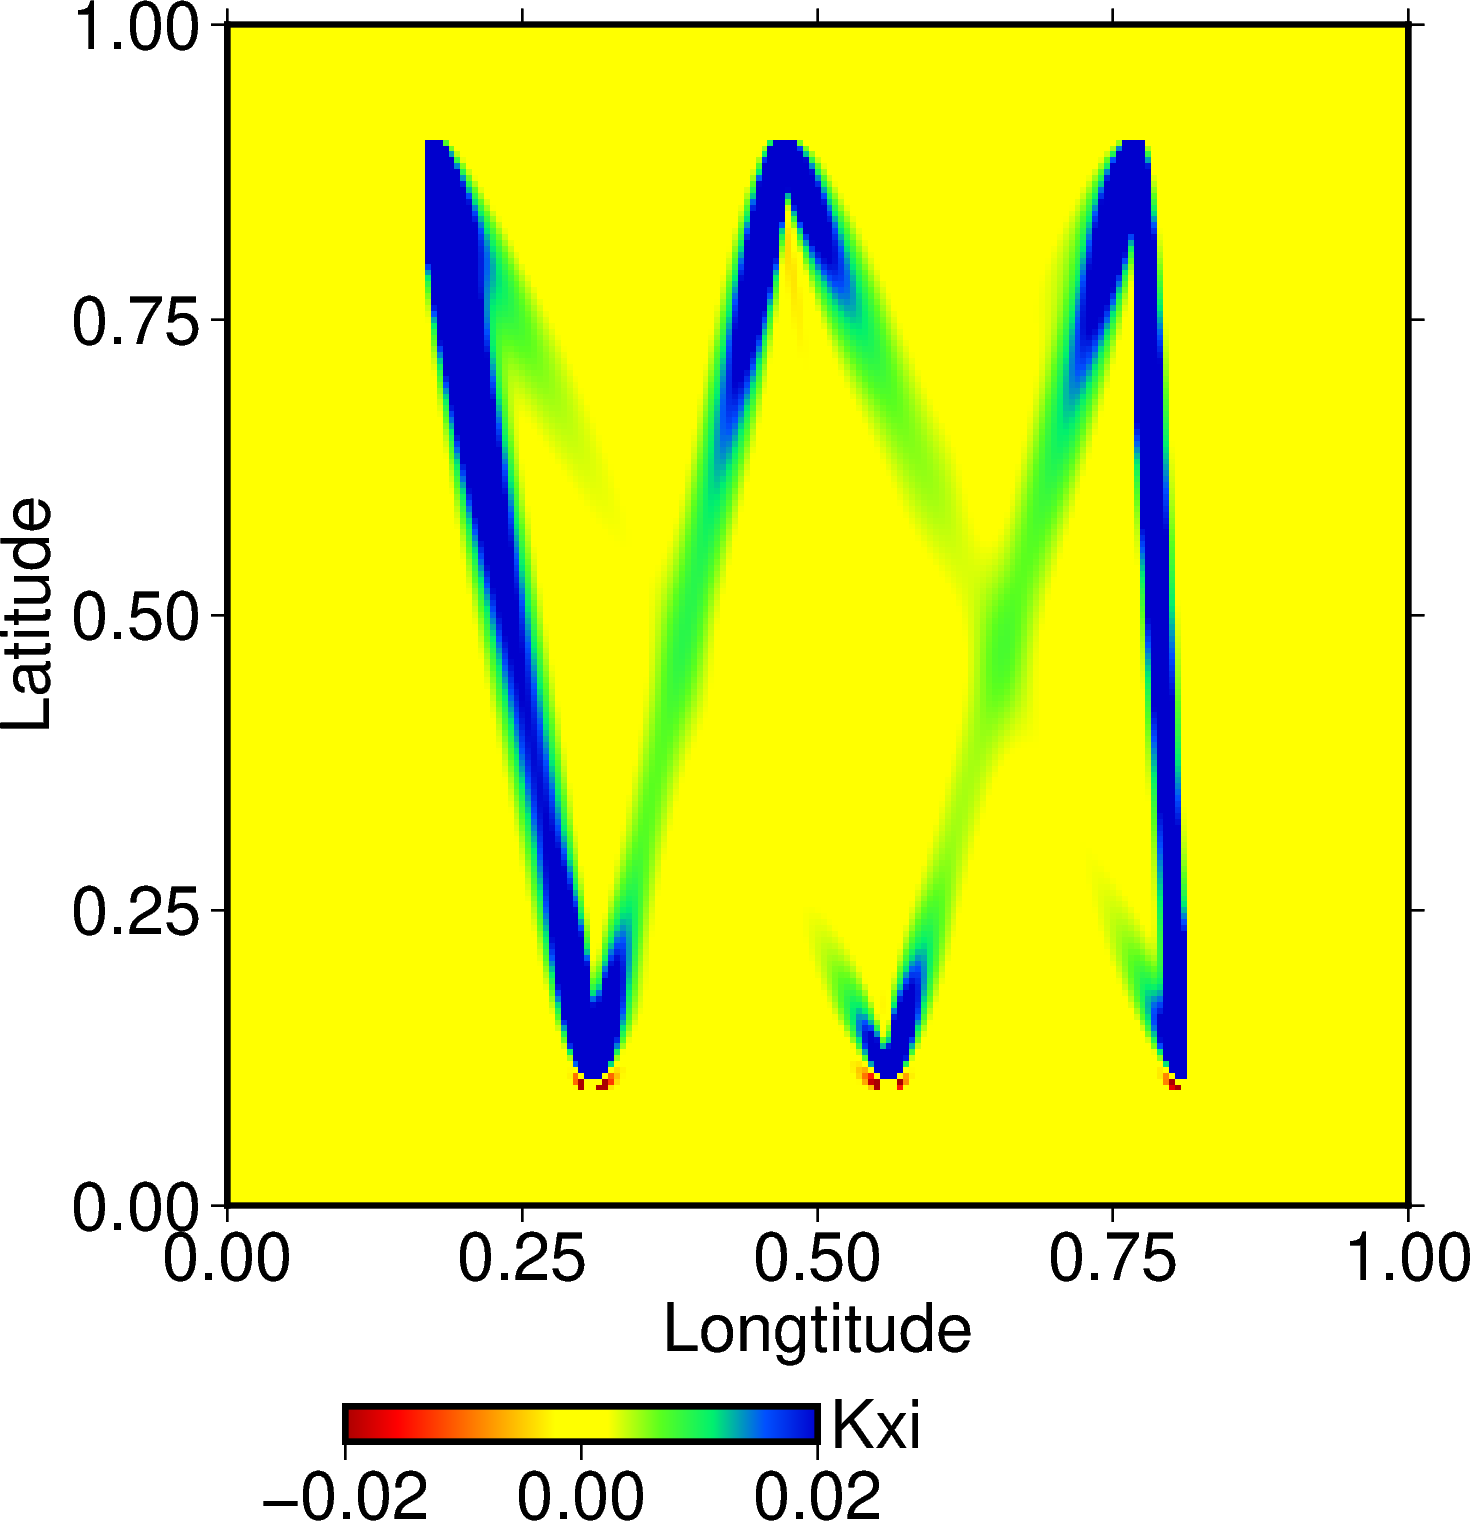

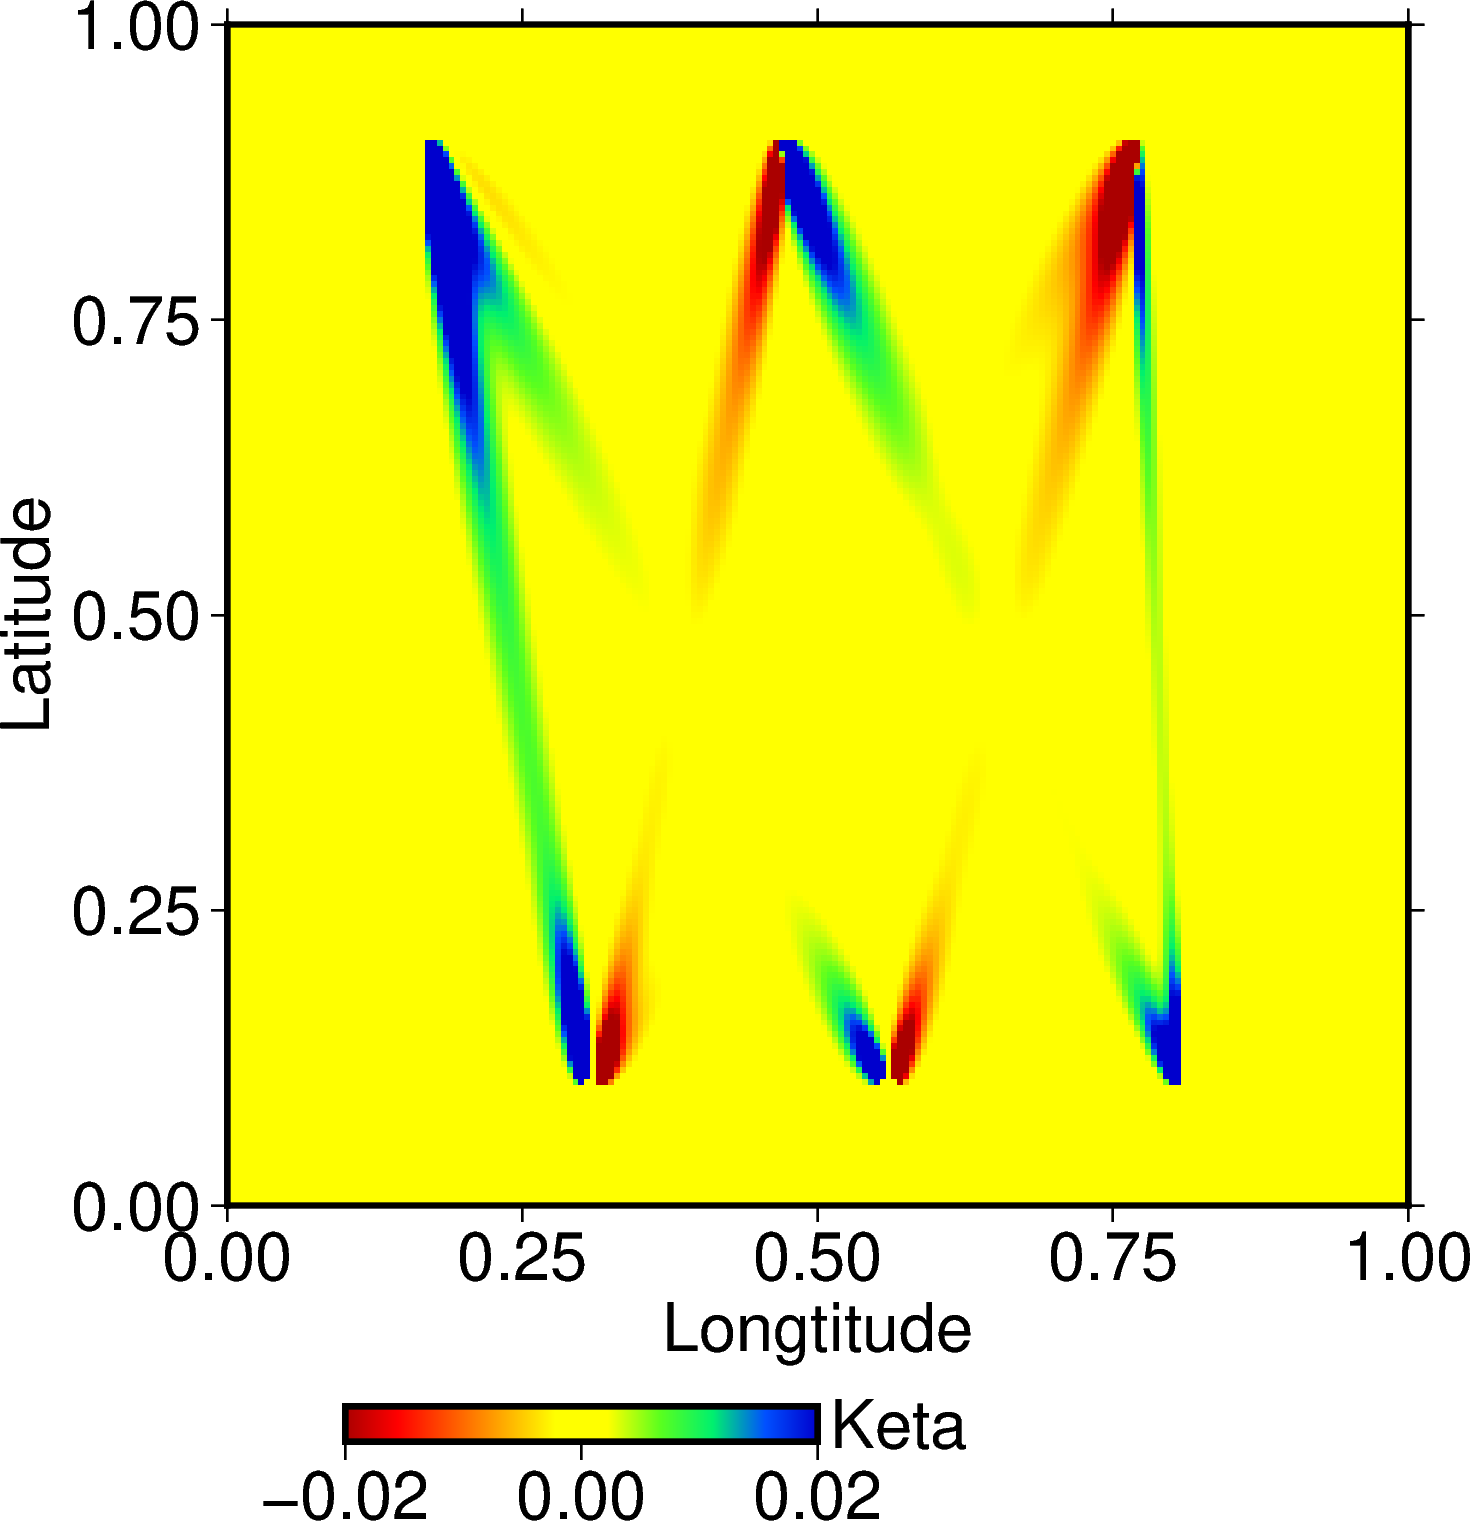

In [3]:
import sys
sys.path.append('../utils')
from functions_for_plot import plot_map

dx = 0.01; dy = 0.01

fname = 'img/4a_kernel_s.png'
fig = plot_map(lon,lat,Ks,dx,dy,
            fname = fname, 
            x_label = "Longtitude",
            y_label = "Latitude",
            colorbar = "Ks",
            cpt_range = [-0.02, 0.02],)

fname = 'img/4b_kernel_xi.png'
fig = plot_map(lon,lat,Kxi,dx,dy,
            fname = fname, 
            x_label = "Longtitude",
            y_label = "Latitude",
            colorbar = "Kxi",
            cpt_range = [-0.02, 0.02],)

fname = 'img/4c_kernel_eta.png'
fig = plot_map(lon,lat,Keta,dx,dy,
            fname = fname, 
            x_label = "Longtitude",
            y_label = "Latitude",
            colorbar = "Keta",
            cpt_range = [-0.02, 0.02],)

In [4]:
dataset = "Ks_over_Kden_inv_0000"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()
Ks_over_Kden = data_field.interp_dep(depth, field=dataset)[:,2]

dataset = "Kxi_over_Kden_inv_0000"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()
Kxi_over_Kden = data_field.interp_dep(depth, field=dataset)[:,2]

dataset = "Keta_over_Kden_inv_0000"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()
Keta_over_Kden = data_field.interp_dep(depth, field=dataset)[:,2]

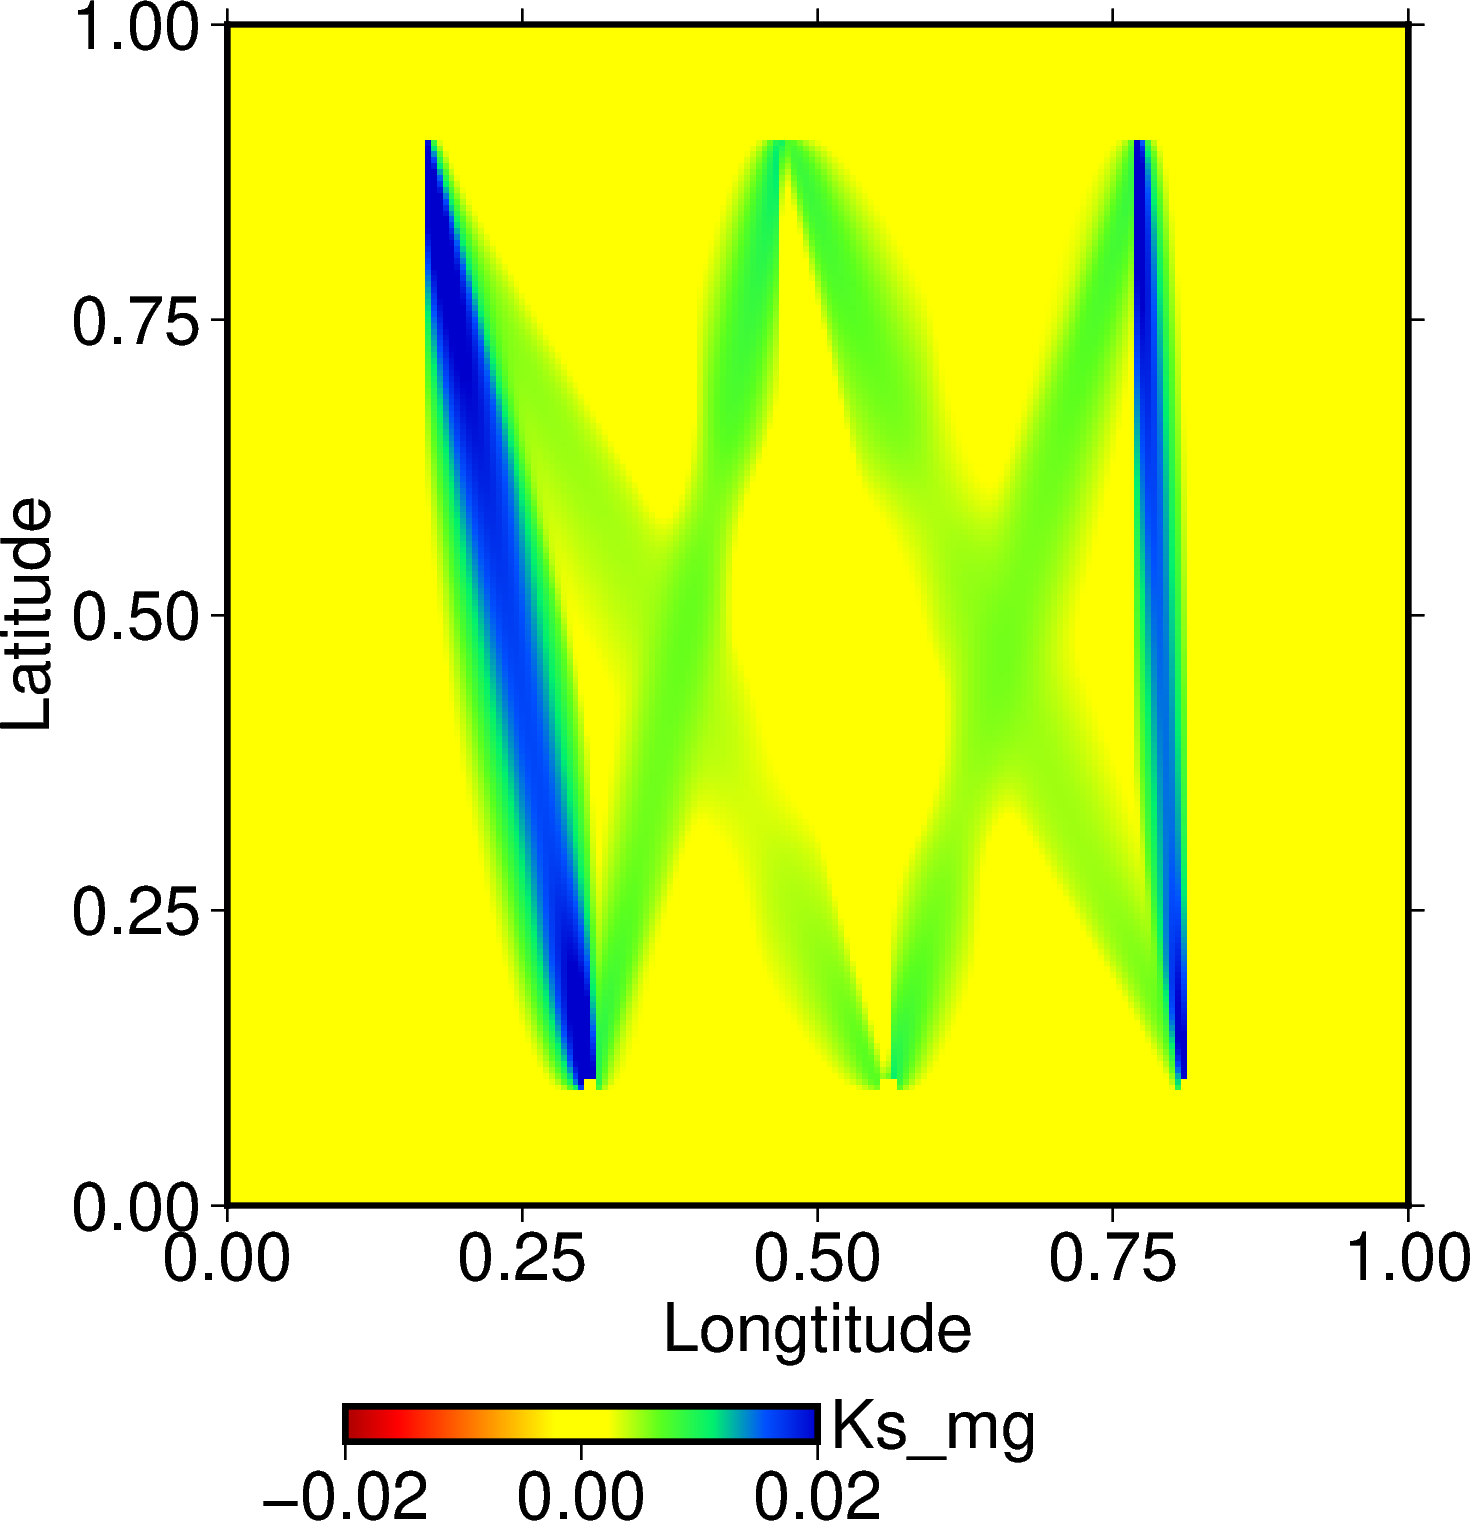

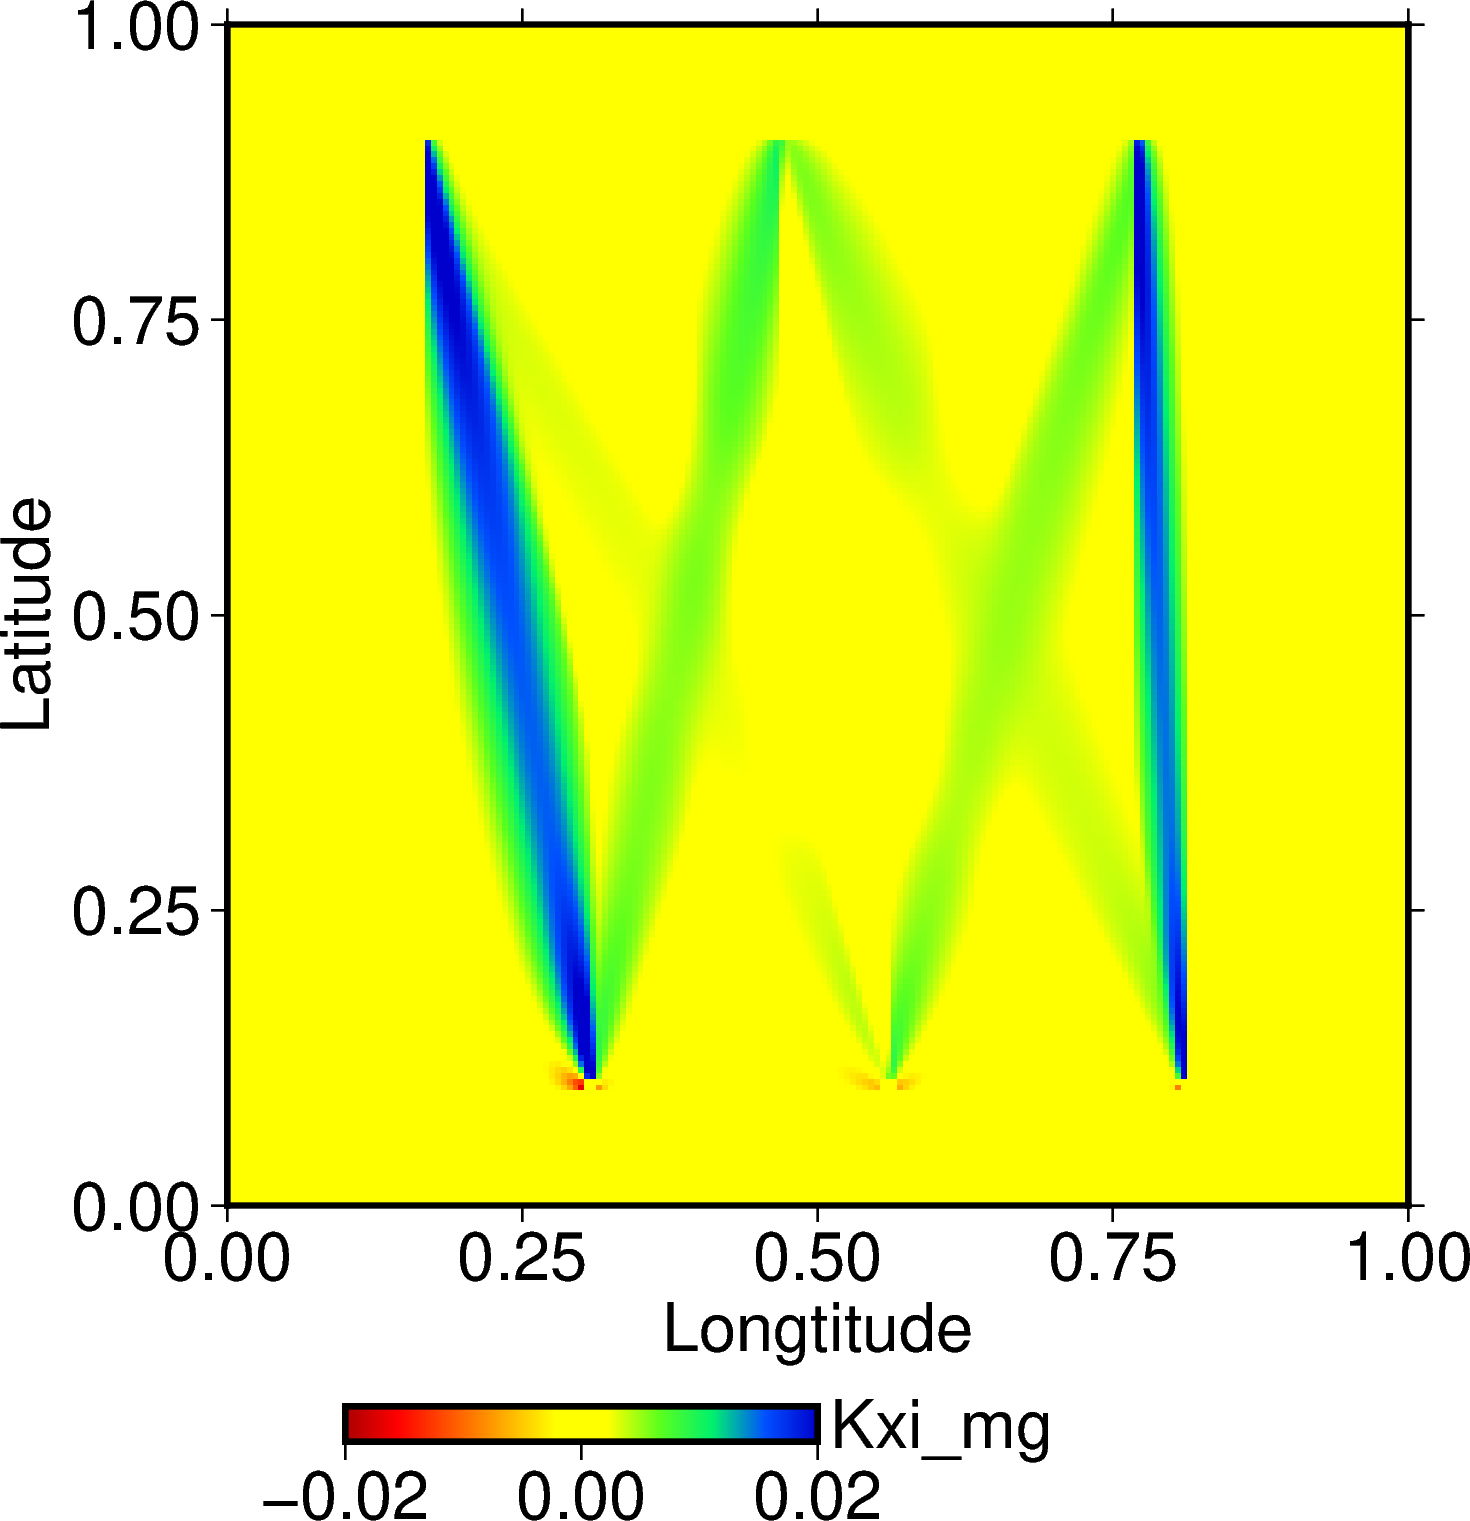

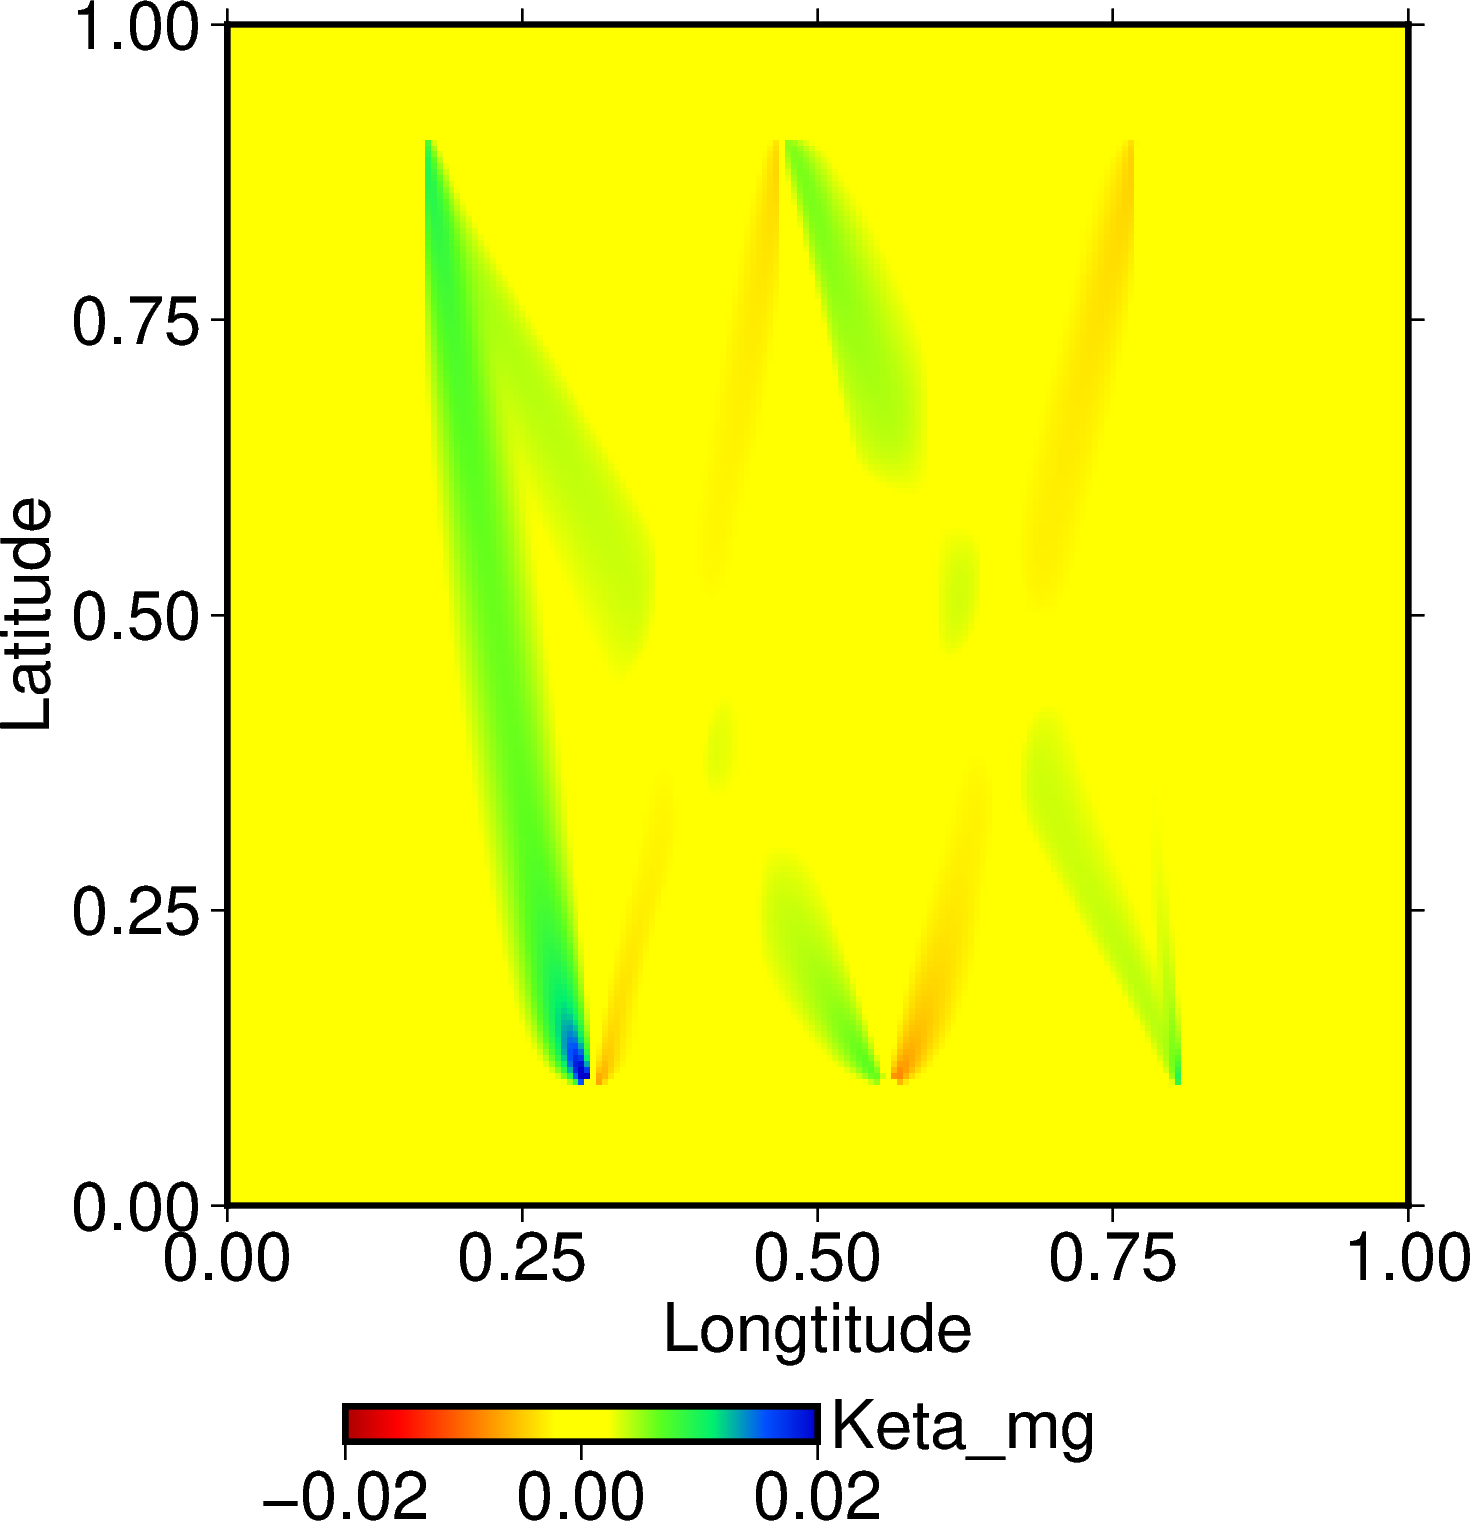

In [5]:
fname = 'img/4d_kernel_over_den_s.png'
fig = plot_map(lon,lat,Ks_over_Kden,dx,dy,
            fname = fname, 
            x_label = "Longtitude",
            y_label = "Latitude",
            colorbar = "Ks_mg",
            cpt_range = [-0.02, 0.02],)

fname = 'img/4e_kernel_over_den_xi.png'
fig = plot_map(lon,lat,Kxi_over_Kden,dx,dy,
            fname = fname, 
            x_label = "Longtitude",
            y_label = "Latitude",
            colorbar = "Kxi_mg",
            cpt_range = [-0.02, 0.02],)

fname = 'img/4f_kernel_over_den_eta.png'
fig = plot_map(lon,lat,Keta_over_Kden,dx,dy,
            fname = fname, 
            x_label = "Longtitude",
            y_label = "Latitude",
            colorbar = "Keta_mg",
            cpt_range = [-0.02, 0.02],)

# read and plot kernel smoothed by multiple-grid parameterization

Update of slowness, xi, and eta can be regarded as the rescaled sensitivity kernel of slowness, xi, and eta smoothed by inversion grid parameterizartion.

In [6]:
dataset = "Ks_update_inv_0000"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()
Ks_mg = data_field.interp_dep(depth, field=dataset)[:,2]

dataset = "Kxi_update_inv_0000"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()
Kxi_mg = data_field.interp_dep(depth, field=dataset)[:,2]

dataset = "Keta_update_inv_0000"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()
Keta_mg = data_field.interp_dep(depth, field=dataset)[:,2]

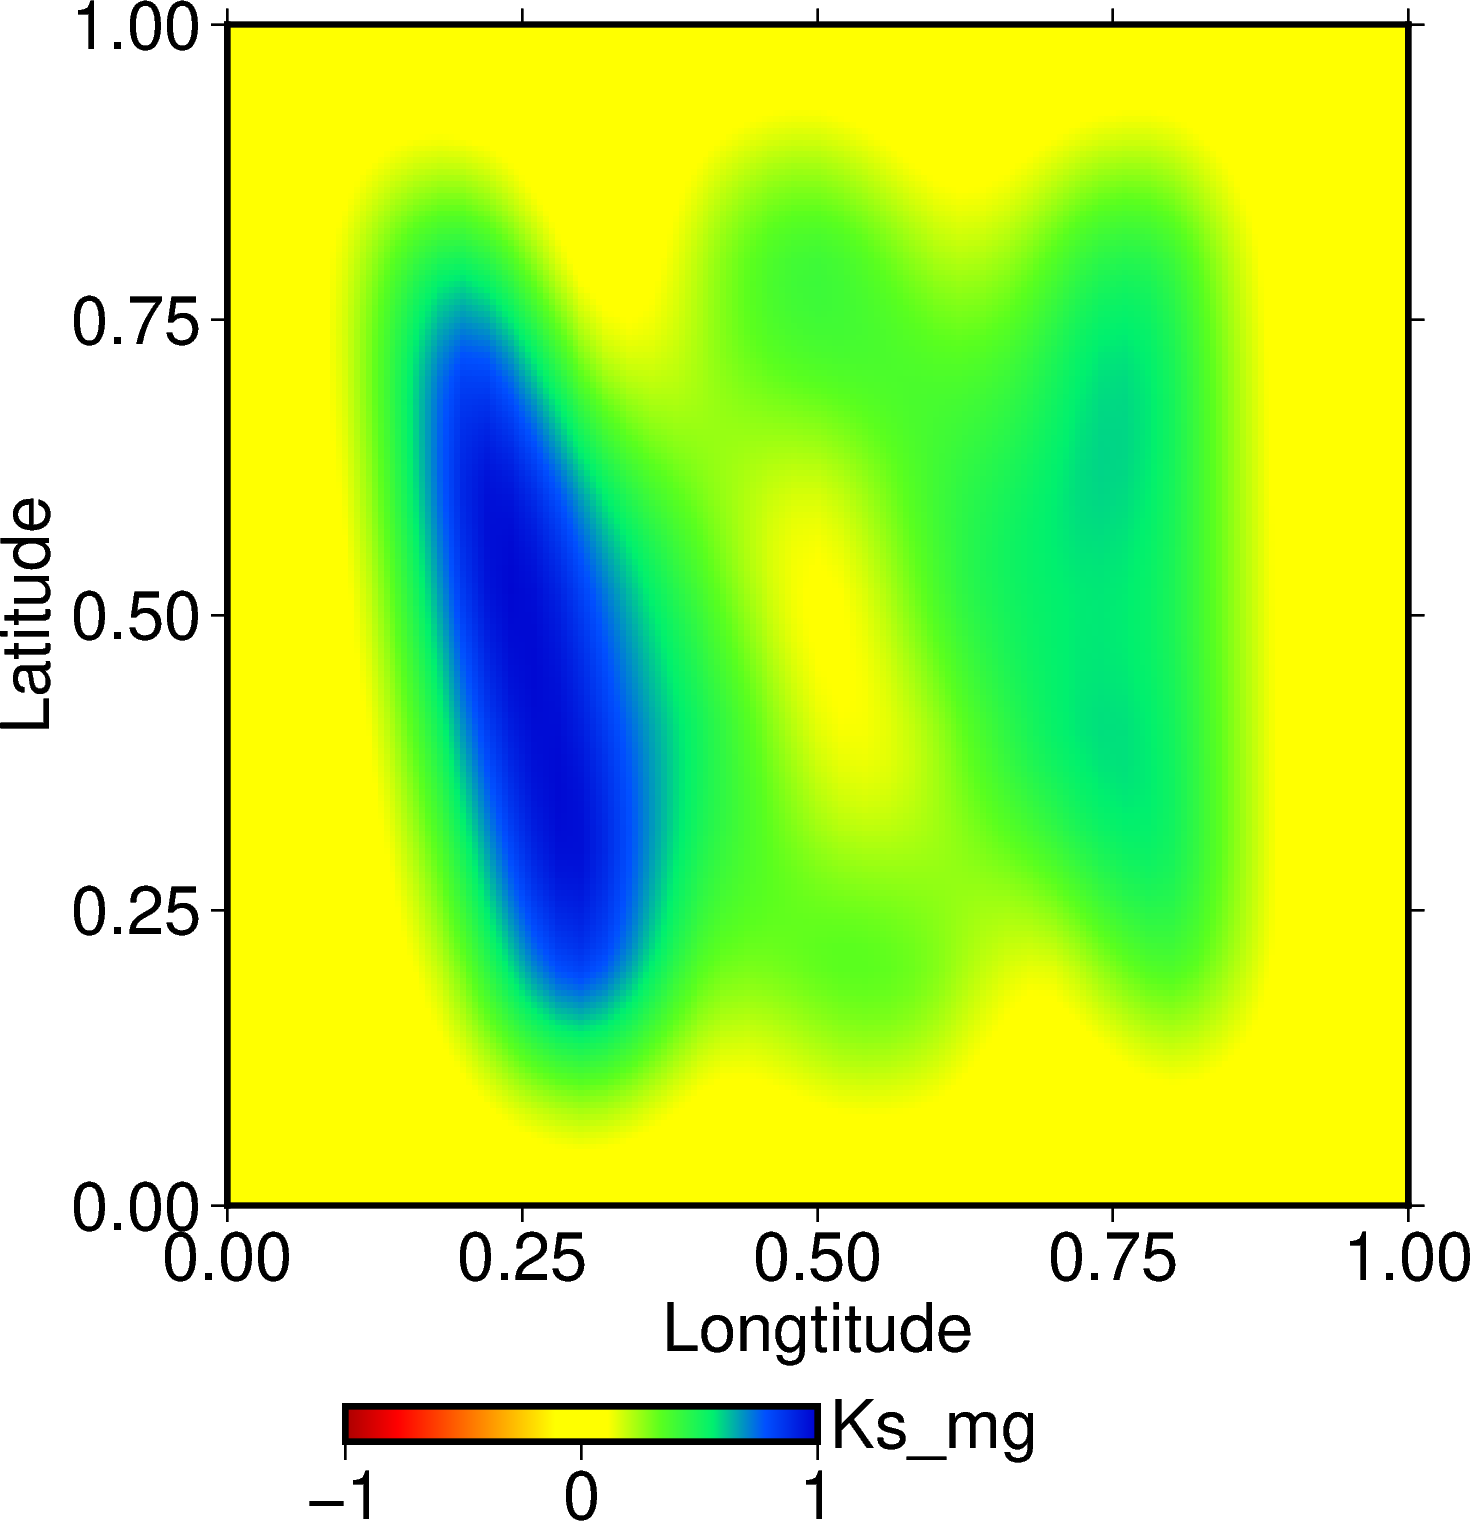

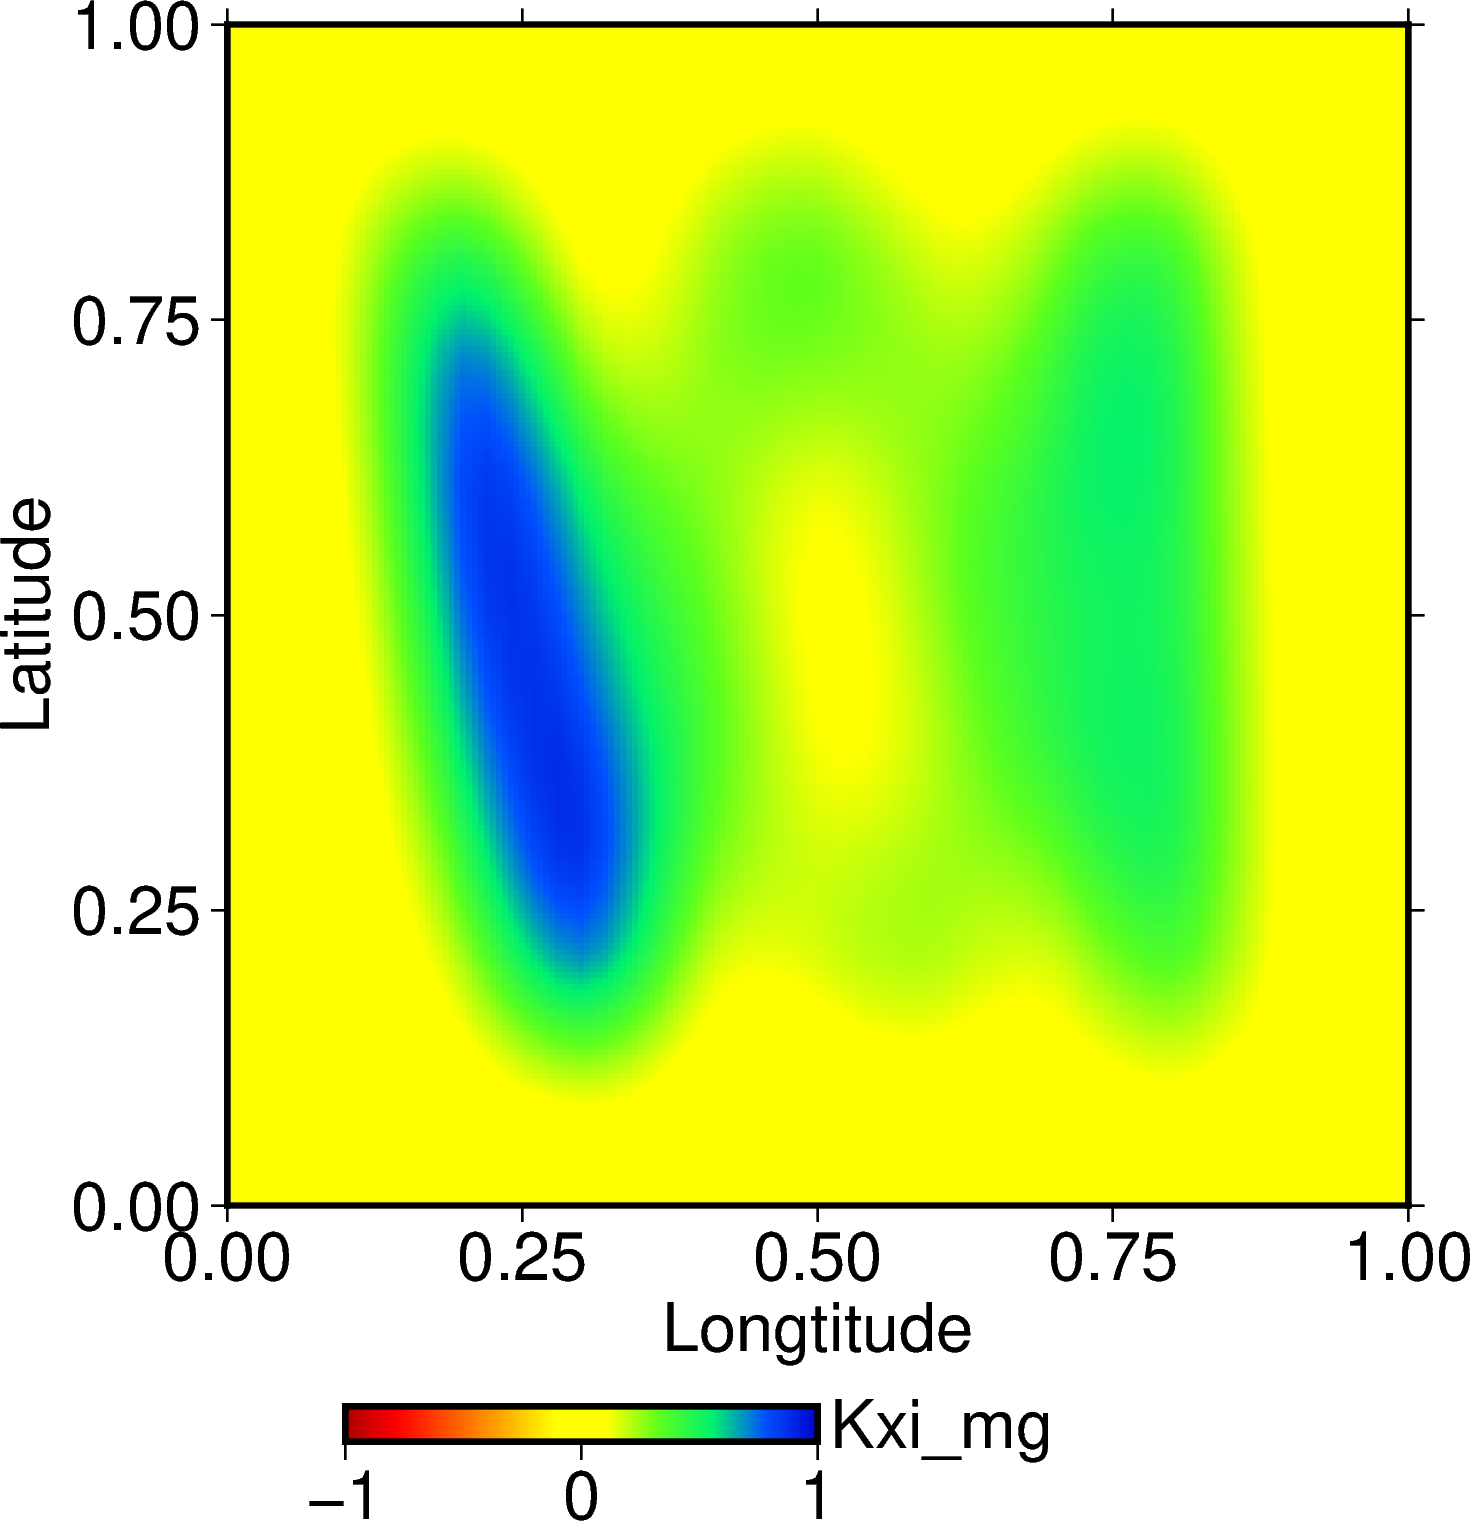

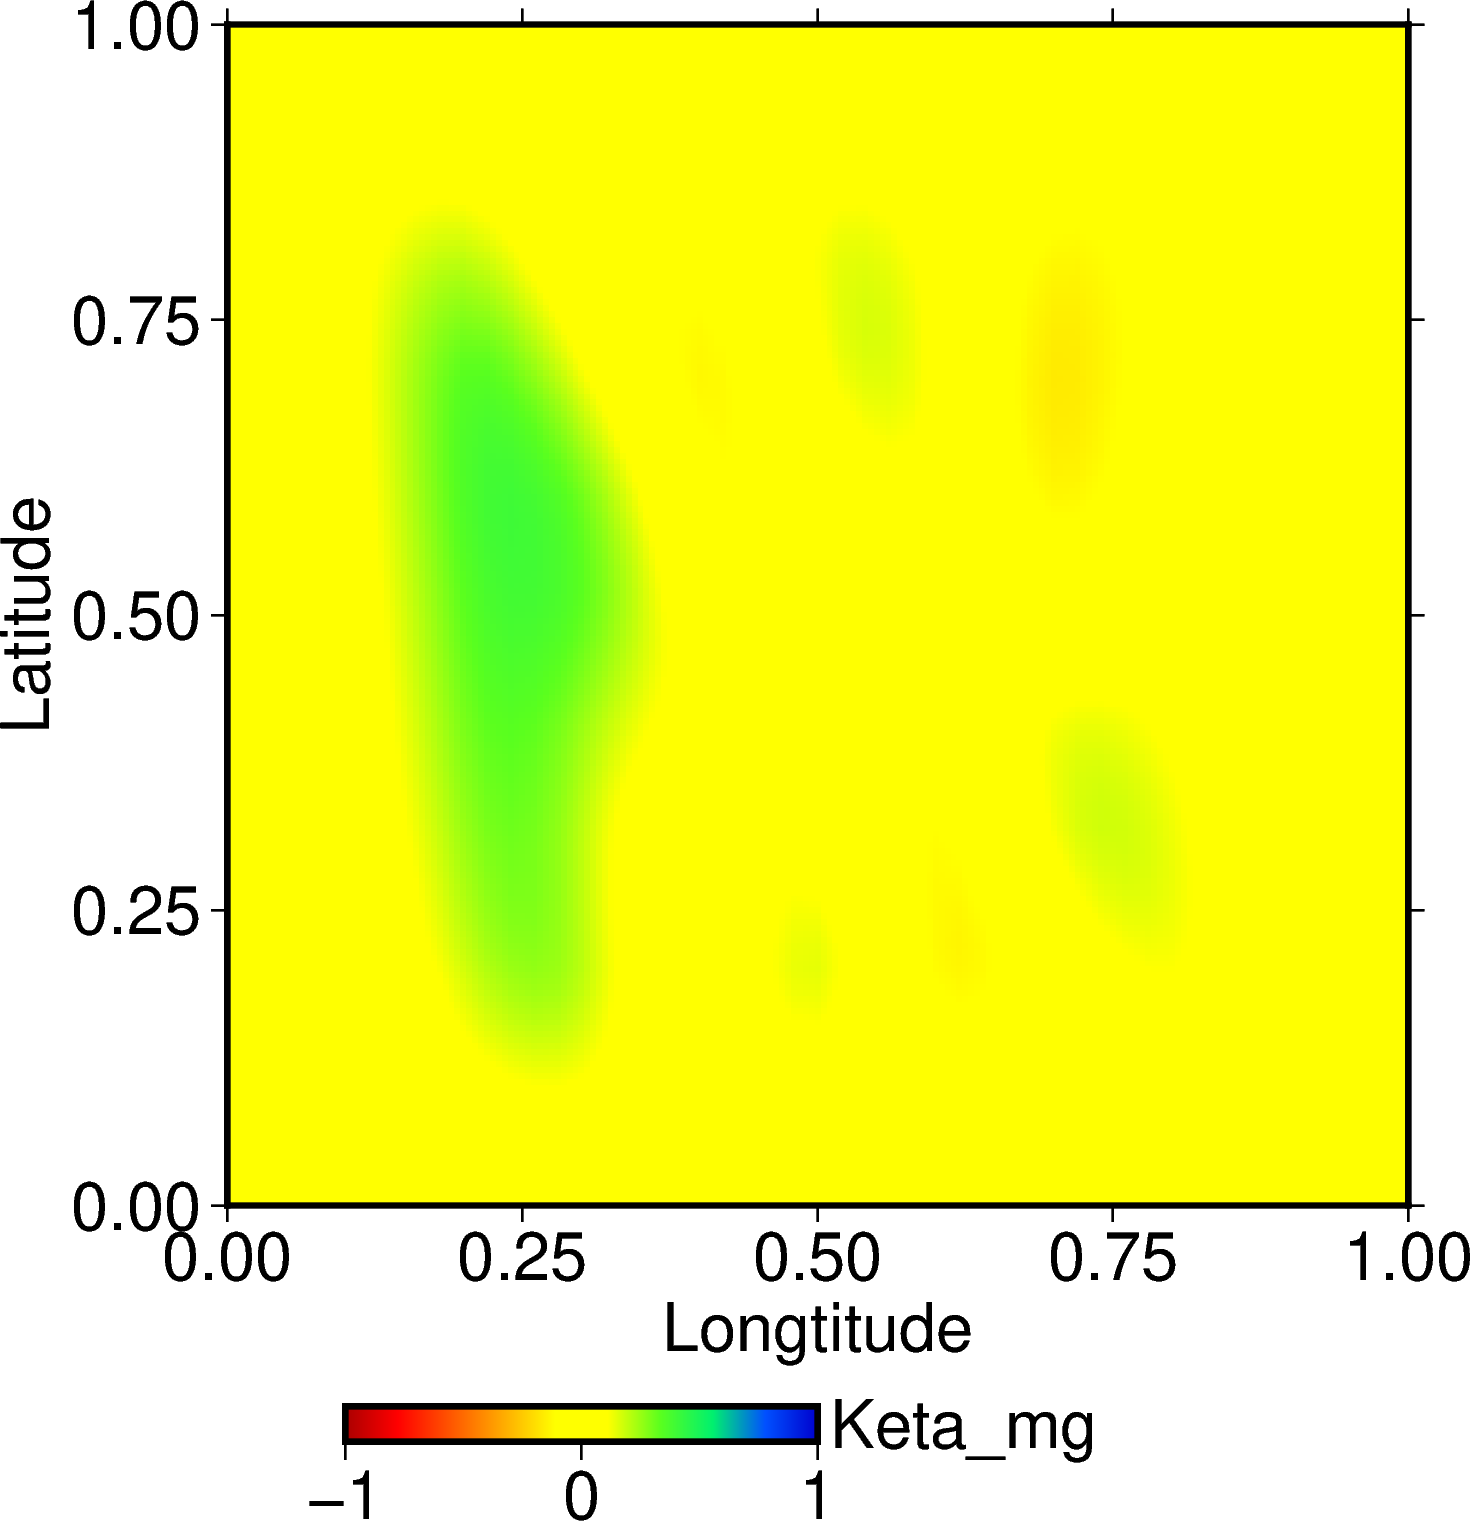

In [7]:
fname = 'img/4g_kernel_mg_s.png'
fig = plot_map(lon,lat,Ks_mg,dx,dy,
            fname = fname, 
            x_label = "Longtitude",
            y_label = "Latitude",
            colorbar = "Ks_mg",
            cpt_range = [-1, 1],)

fname = 'img/4h_kernel_mg_xi.png'
fig = plot_map(lon,lat,Kxi_mg,dx,dy,
            fname = fname, 
            x_label = "Longtitude",
            y_label = "Latitude",
            colorbar = "Kxi_mg",
            cpt_range = [-1, 1],)

fname = 'img/4i_kernel_mg_eta.png'
fig = plot_map(lon,lat,Keta_mg,dx,dy,
            fname = fname, 
            x_label = "Longtitude",
            y_label = "Latitude",
            colorbar = "Keta_mg",
            cpt_range = [-1, 1],)